# **Rain in Australia**
Predict next-day rain in Australia

## Problem Statement

Problem from [Kaggle](https://kaggle.com/datasets):

> The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:


> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)

## Installing Dependencies

In [1]:
#restart the kernel after installation
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 15.1 MB/s 


## Importing Required Libraries

In [5]:
# A Python library for downloading datasets from Kaggle, Google Drive, and other online sources.
import opendatasets as od

# NumPy is the fundamental package for scientific computing in Python
import numpy as np

# Pandas is a data analysis and manipulation library for Python
import pandas as pd 

# OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc
import os

# matplotlib is a Python visualization library
import matplotlib
import matplotlib.pyplot as plt

# Seaborn is a library for making statistical graphics in Python.
import seaborn as sns

# Plotly Express is a new high-level Python visualization library
import plotly.express as px

#Sidetable is an open-sourced Python library that builds simple but useful summary tables of pandas DataFrame.
#Sidetable is a tool that can be useful for data analysis and explorations.
import sidetable as stb 



pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 150)

# It sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')


print('All required libraries are imported')

All required libraries are imported


## Downloading the Data

The dataset is available at https://www.kaggle.com/jsphyg/weather-dataset-rattle-package .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [6]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pankajbarai
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 5.93MB/s]


The dataset is downloaded and extracted to the folder `weather-dataset-rattle-package`.

In [7]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

The file `weatherAUS.csv` contains the data. Let's load it into a Pandas dataframe.

In [8]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [9]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Each row shows the measurements for a given date at a given location. The last column "RainTomorrow" contains the value to be predicted.

Let's check the column types of the dataset.

In [10]:
#check the datasets information 
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Here we can see**

- Datatype of each columns which is  object, and float
- Number of rows is 145460.
- Number of columns is 23
- Dtae column is in object datattype we need change the datatypes while analysis.
- File size after loading the datset 25.5+ MB.

Now we have a rough idea of our datset and we can further procees for analysis

In [11]:
raw_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

There is lot of data missing in some columns.

Lets check and see their percentages


In [12]:
miss = pd.DataFrame({'cols': raw_df.columns,
                     'Missing': [any(raw_df[x].isnull()) for x in raw_df.columns],
                    'Count_': [sum(raw_df[x].isnull()) for x in raw_df.columns],
                     'Percentage': [sum(raw_df[x].isnull())*100/raw_df.shape[0] for x in raw_df.columns]})
miss.sort_values(by = 'Count_', ascending = False)

,cols,Missing,Count_,Percentage
6,Sunshine,True,69835,48.009762
5,Evaporation,True,62790,43.166506
18,Cloud3pm,True,59358,40.807095
17,Cloud9am,True,55888,38.421559
15,Pressure9am,True,15065,10.356799
16,Pressure3pm,True,15028,10.331363
9,WindDir9am,True,10566,7.263853
7,WindGustDir,True,10326,7.098859
8,WindGustSpeed,True,10263,7.055548
14,Humidity3pm,True,4507,3.098446


> Here we can see that,
- Sunshine, Evaportaion & Cloud3pm columns having more than 40% data missing.
- where Cloud9am, Pressure9am and Pressure3pm having 38.4, 10.5 & 10.3 percantage data missing respectively.

> Lets drop the any rows where the value of the target column `RainTommorow` is empty

In [13]:
raw_df.dropna(subset = ['RainTomorrow'], inplace = True)

In [14]:
#lets chcek again any missing values still present in RainTommorow columns
raw_df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [15]:
#converting Date feature to datetime datatype and extracting year, month and day from Date column.
raw_df['Date'] = pd.to_datetime(raw_df['Date'])
raw_df['year'] = raw_df['Date'].dt.year
raw_df['Month'] = raw_df['Date'].dt.month
raw_df['day'] = raw_df['Date'].dt.day
# raw_df['Date'] =  pd.to_numeric(pd.to_datetime(raw_df['Date']))

## Exploratory Data Analysis 

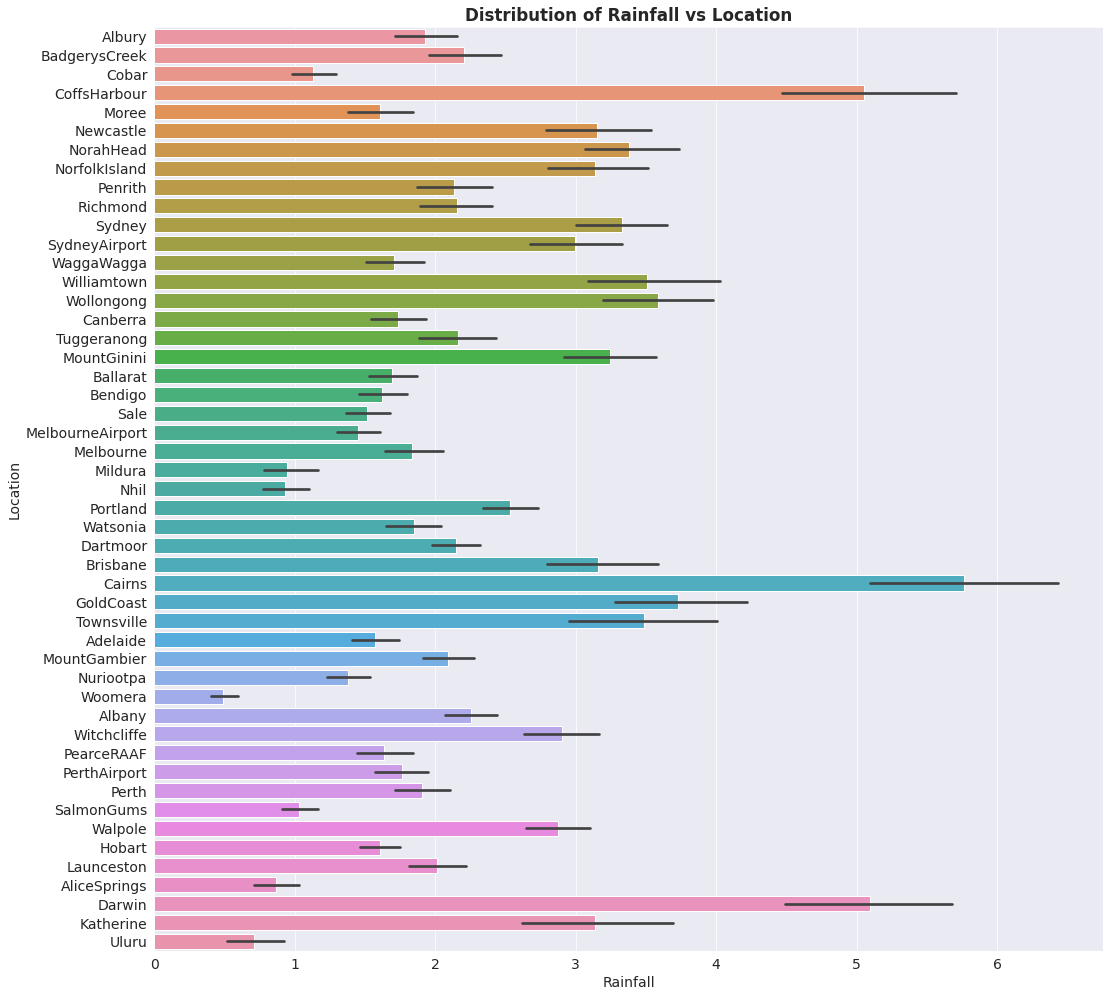

In [21]:
plt.figure(figsize = (17,17))
plt.title('Distribution of Rainfall vs Location', fontweight= 'bold')
sns.barplot(x = raw_df['Rainfall'],y = raw_df['Location']);

- From above graph, we can see that `Cairns`,`Darwin` and `CoffsHarbour` city having highest `Rainfall`.

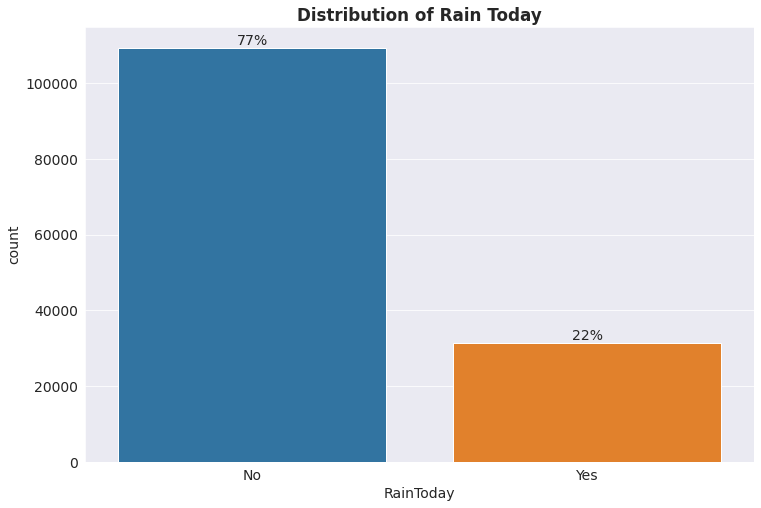

In [20]:
plt.figure(figsize = (12,8))
plt.title('Distribution of Rain Today', fontweight= 'bold')
ax = sns.countplot(raw_df['RainToday'])
for p in ax.patches:
  x = p.get_bbox().get_points()[:,0]
  y = p.get_bbox().get_points()[1,1]

  ax.annotate('{:.2g}%'.format(100.*y/len(raw_df)), (x.mean(),y), ha='center', va = 'bottom')
plt.show()

- Here we can tell almost 76% chances of rain today and 22% of chances there is no rain today.  

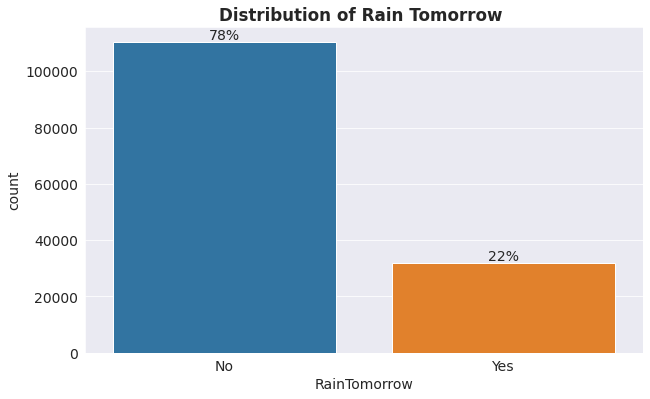

In [21]:
plt.title('Distribution of Rain Tomorrow ', fontweight = 'bold')

ax = sns.countplot(raw_df['RainTomorrow'])

for p in ax.patches:
  x = p.get_bbox().get_points()[:,0]
  y = p.get_bbox().get_points()[1,1]

  ax.annotate('{:.2g}%'.format(100.*y/len(raw_df)),(x.mean(),y), ha = 'center', va = 'bottom')
plt.show()


Data is imbalanced

  `RainToday` ~ `RainTomorrow`

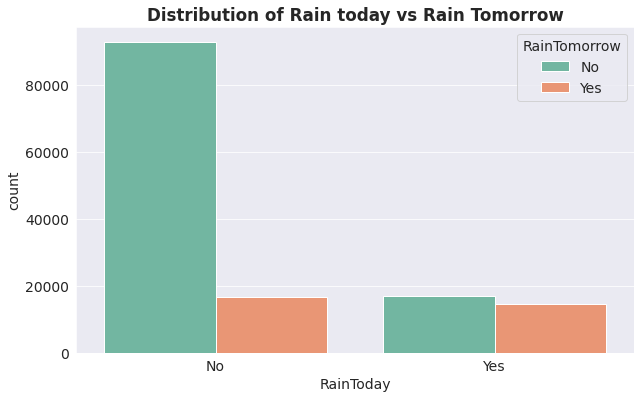

In [22]:
plt.title('Distribution of Rain today vs Rain Tomorrow', fontweight= 'bold')
sns.countplot(raw_df['RainToday'], hue = raw_df['RainTomorrow'], palette = 'Set2')
plt.show()

In [23]:
x = pd.crosstab(raw_df['RainToday'], raw_df['RainTomorrow'])
y = x/x.transpose().sum().values.reshape(2,1)*100
print(y)

RainTomorrow         No        Yes
RainToday                         
No            84.813229  15.186771
Yes           53.594023  46.405977


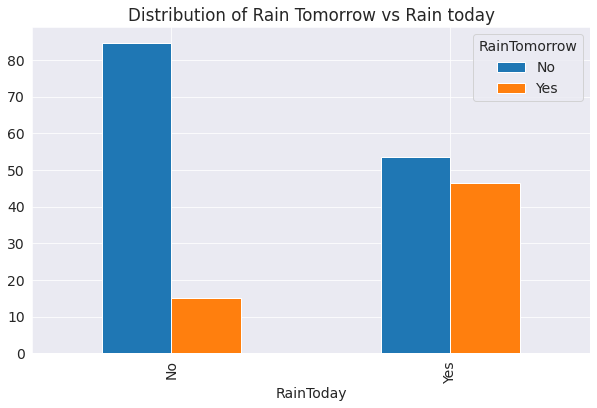

In [24]:
y.plot(kind = 'bar', title = 'Distribution of Rain Tomorrow vs Rain today');

> if it's not raining today then the chance of raining tomorrow = 15% 
And there is also chance that tomorrow will be no rain which is telling us almost 85%

> while if it's raining today then the chance of raining tomorrow = 46% and no raining 54%

  `Location` ~ `RainToday`

In [22]:
x = pd.crosstab(raw_df['Location'], raw_df['RainToday'])
y = x/x.transpose().sum().values.reshape((-1,1))*100
y.sort_values(by = 'No',ascending= False)

RainToday,No,Yes
Location,,
Woomera,93.264075,6.735925
Uluru,92.476698,7.523302
AliceSprings,92.033058,7.966942
Mildura,89.151414,10.848586
Cobar,87.114094,12.885906
Moree,86.313149,13.686851
Nhil,84.664537,15.335463
SalmonGums,84.053043,15.946957
Katherine,83.365696,16.634304


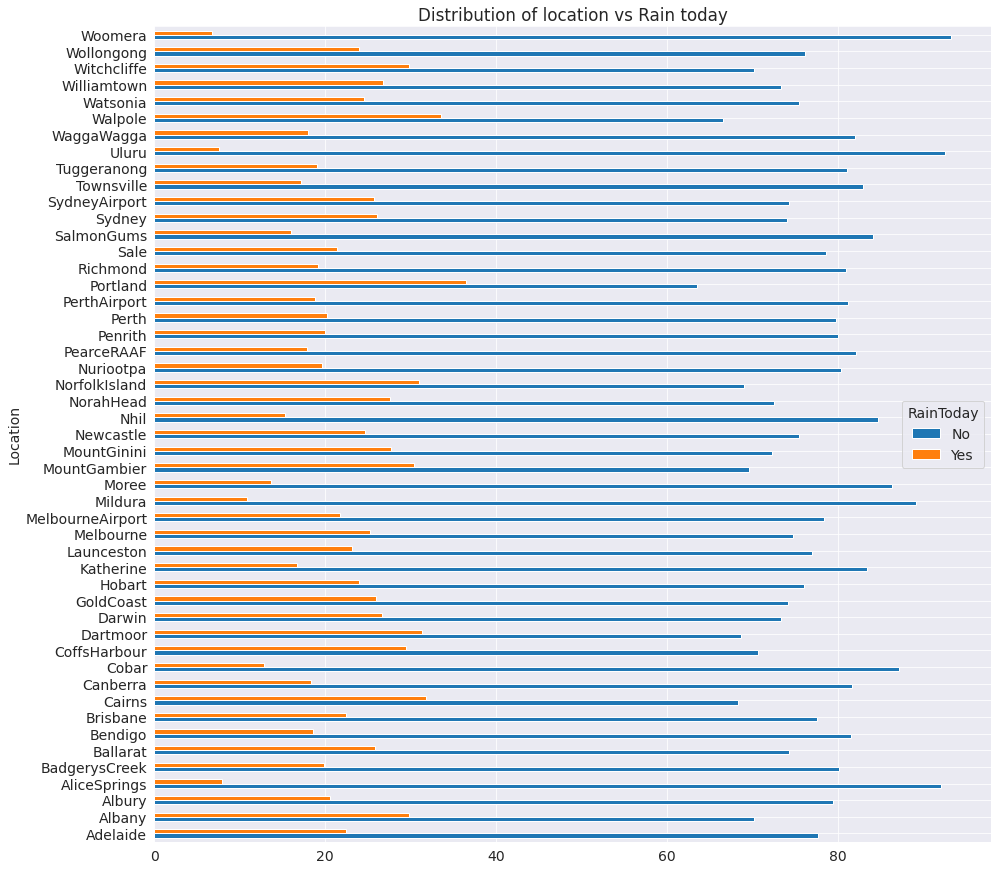

In [26]:
# plt.title('Distribution of location vs Rain today', fontweight = 'bold')
y.plot(kind = 'barh', figsize = (15,15), title = 'Distribution of location vs Rain today' );

Does Temperature affecting Raining?

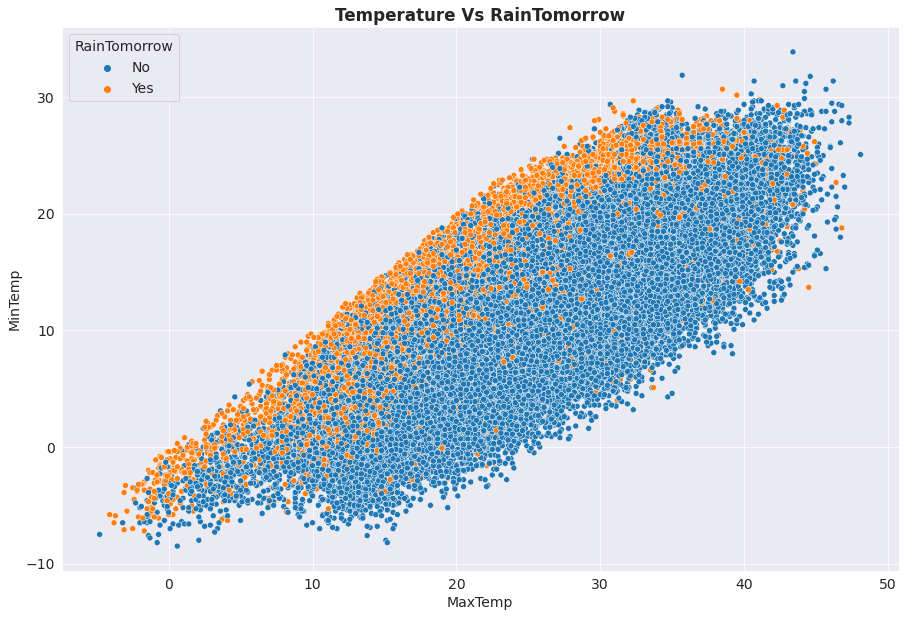

In [27]:
plt.figure(figsize=(15,10))
plt.title('Temperature Vs RainTomorrow', fontweight = 'bold')
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', data = raw_df,hue = 'RainTomorrow')
plt.show()

> Here we can say that by looking graph is that its increasing linearly as temperature increases.
> 
> Or we can say, chances of raining tomorrow increases when maximum temperature and minimum temperature are close to each other

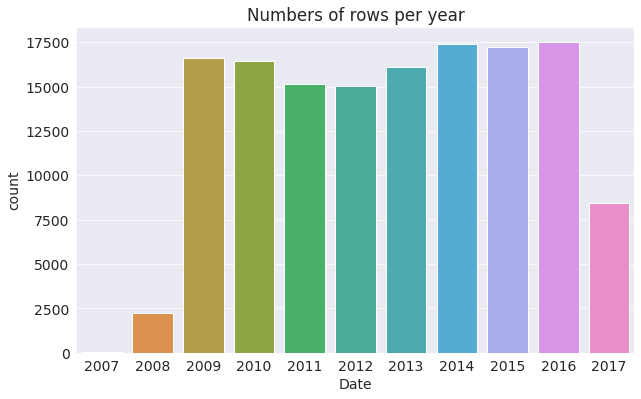

In [28]:
plt.title('Numbers of rows per year')
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year);

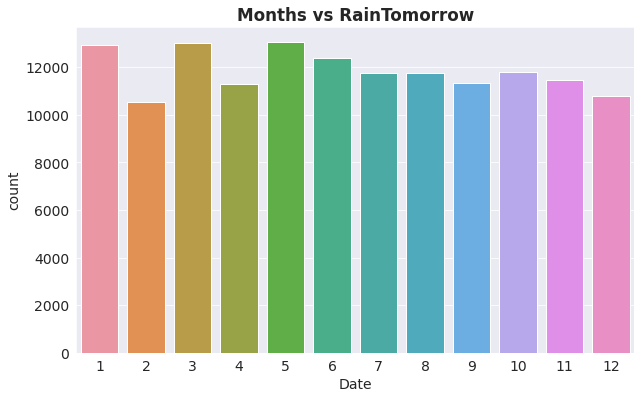

In [29]:
plt.title('Months vs RainTomorrow', fontweight = 'bold')
sns.countplot(data = raw_df[raw_df['RainTomorrow']=='Yes'], x = pd.to_datetime(raw_df.Date).dt.month)
plt.show()

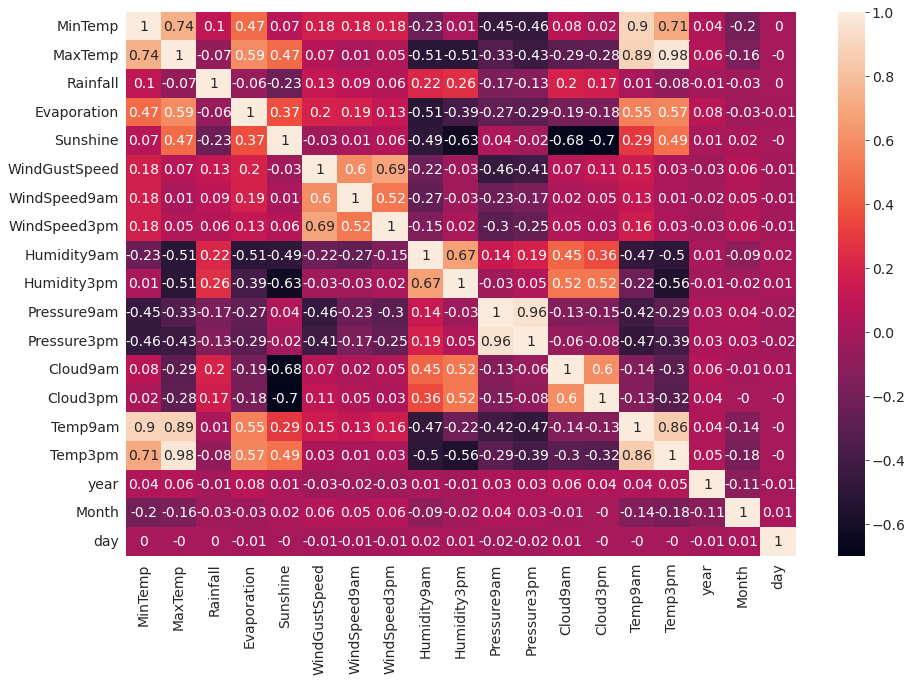

In [30]:
corr = raw_df.corr().round(2)
# corr.style.background_gradient (cmap = 'BrBG')  
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot= True)
plt.show()

In [16]:
#Dropping date columns , we already extracted month, year and day from date.
raw_df.drop(columns = ['Date'], inplace = True)

## Handling Missing values:

In [17]:
miss.sort_values(by = 'Count_', ascending = False)

,cols,Missing,Count_,Percentage
6,Sunshine,True,69835,48.009762
5,Evaporation,True,62790,43.166506
18,Cloud3pm,True,59358,40.807095
17,Cloud9am,True,55888,38.421559
15,Pressure9am,True,15065,10.356799
16,Pressure3pm,True,15028,10.331363
9,WindDir9am,True,10566,7.263853
7,WindGustDir,True,10326,7.098859
8,WindGustSpeed,True,10263,7.055548
14,Humidity3pm,True,4507,3.098446


In [18]:
# filling feature with large percentage of missing data using random choice 
lst = [ 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']
for col in lst:
  fill_lst = raw_df[col].dropna()
  # print(fill_lst)
  raw_df[col] = raw_df[col].fillna(pd.Series(np.random.choice(fill_lst, size = len(raw_df.index))))


In [19]:
#Categorical features
s = (raw_df.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)
for i in object_cols:
  raw_df[i].fillna(raw_df[i].mode()[0], inplace = True)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [20]:
#numerical features
t = (raw_df.dtypes == 'float64')
num_cols = list(t[t].index)
print(num_cols)
for i in num_cols:
  raw_df[i].fillna(raw_df[i].median(), inplace = True)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [21]:
#lets check again if there is any missing values.
raw_df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
Month            0
day              0
dtype: int64

- No missing values.

Now lets check outlier in dataset

## Handling outliers in the dataset:

In [22]:
numeric_cols = raw_df.select_dtypes(include = np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes('object').columns.tolist()
print("numeric_cols : ",numeric_cols)
print('-----------------------------------------------------------------------------------------------------------------------------------------')
print("categorical_cols : ",categorical_cols)

numeric_cols :  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'Month', 'day']
-----------------------------------------------------------------------------------------------------------------------------------------
categorical_cols :  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


MinTemp


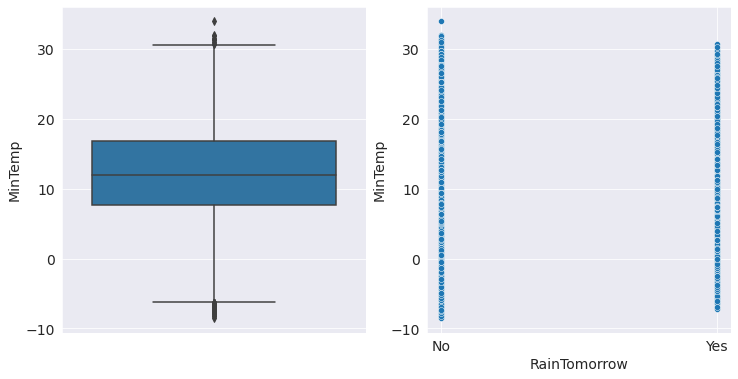

MaxTemp


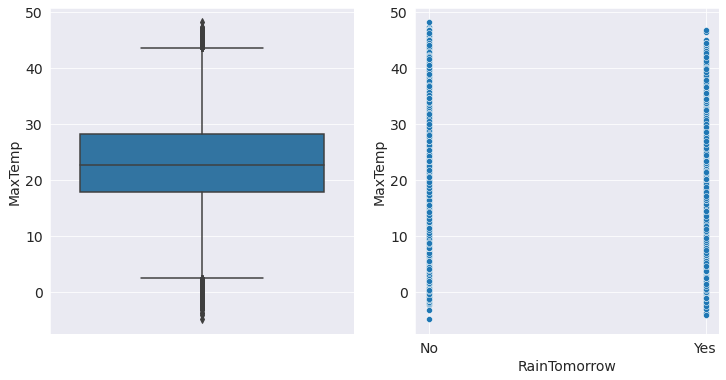

Rainfall


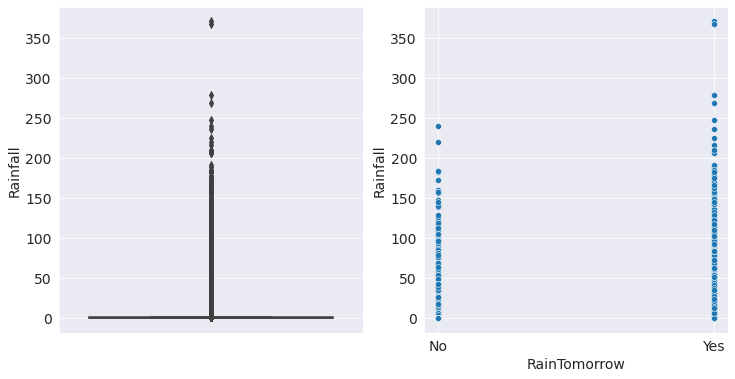

Evaporation


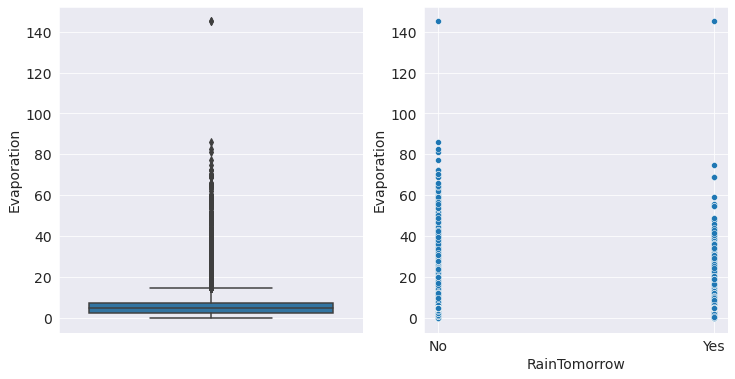

Sunshine


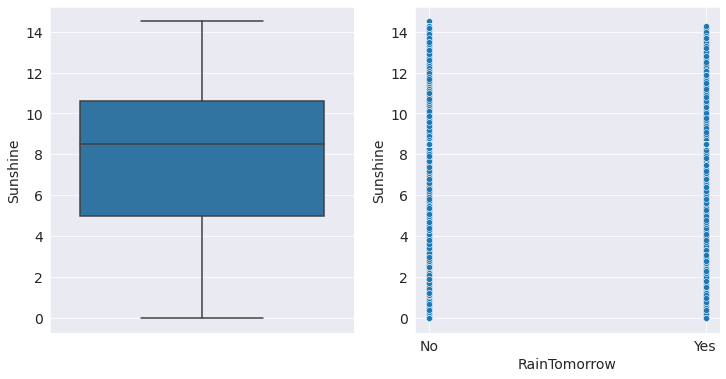

WindGustSpeed


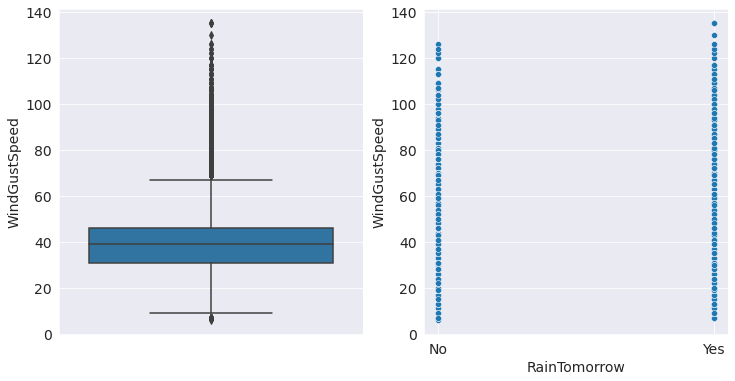

WindSpeed9am


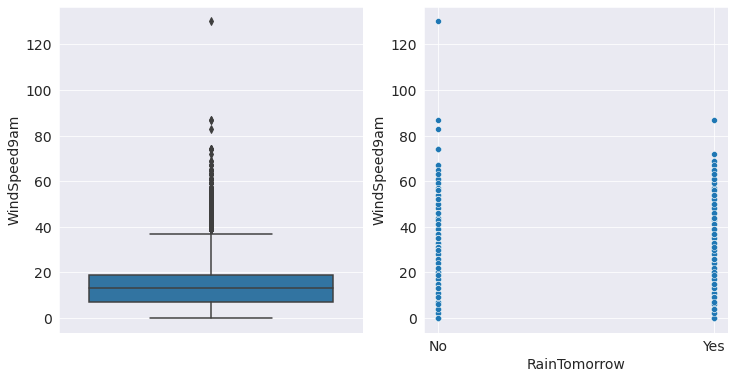

WindSpeed3pm


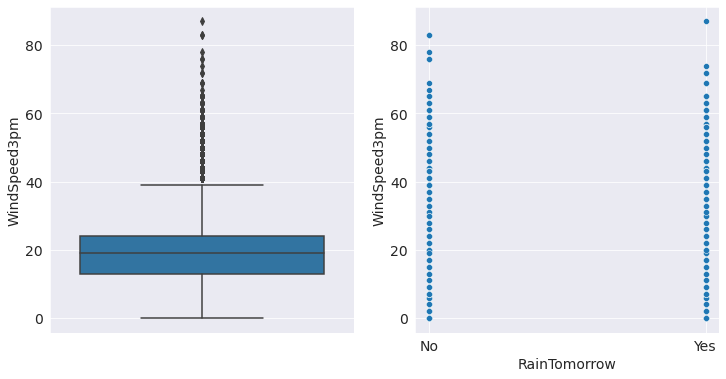

Humidity9am


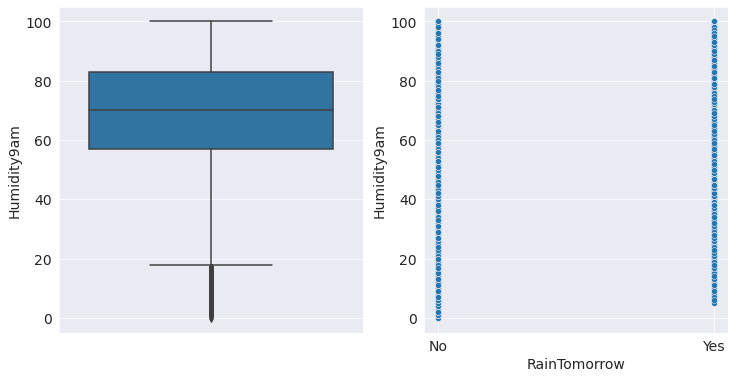

Humidity3pm


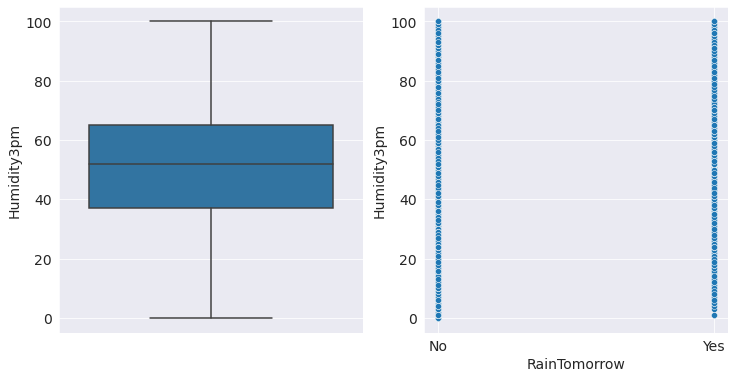

Pressure9am


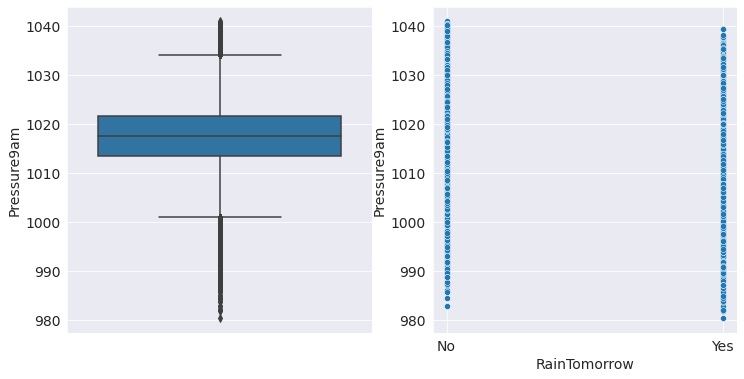

Pressure3pm


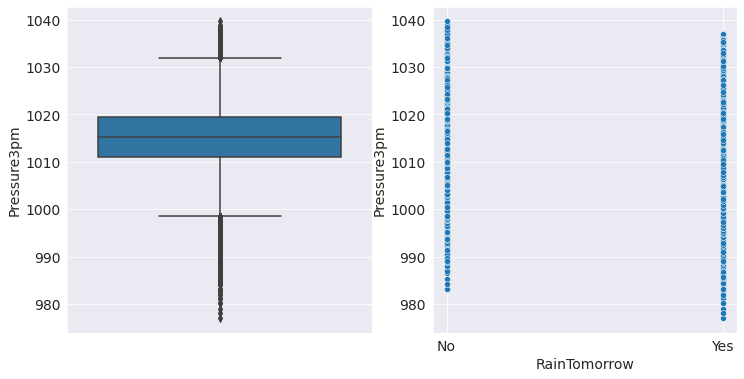

Cloud9am


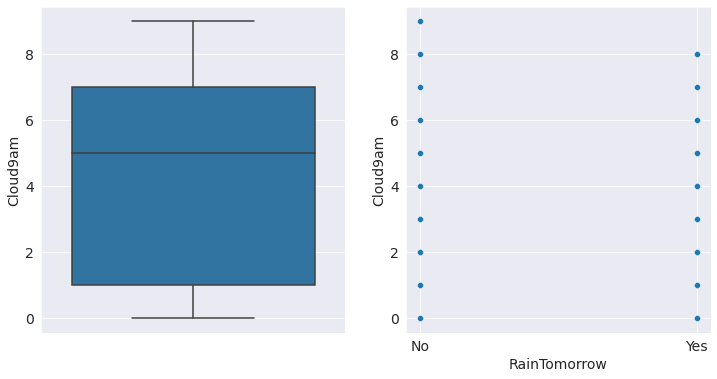

Cloud3pm


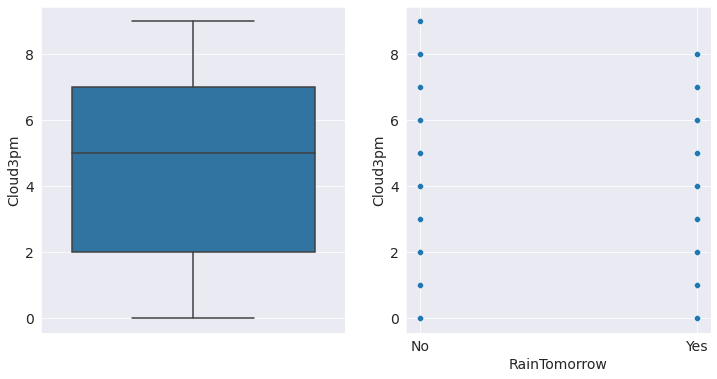

Temp9am


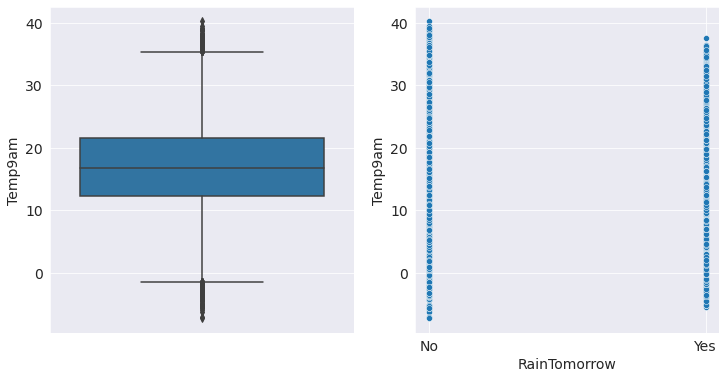

Temp3pm


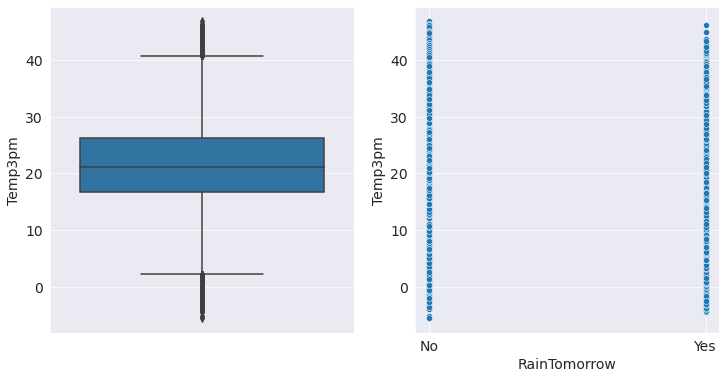

year


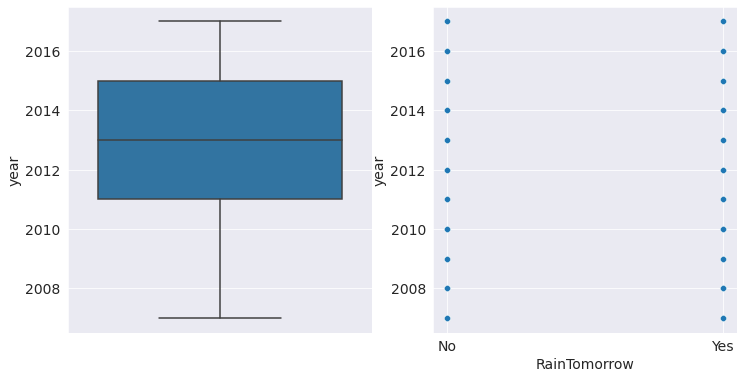

Month


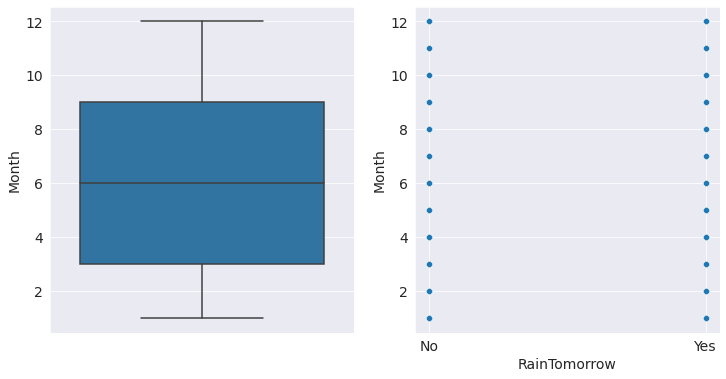

day


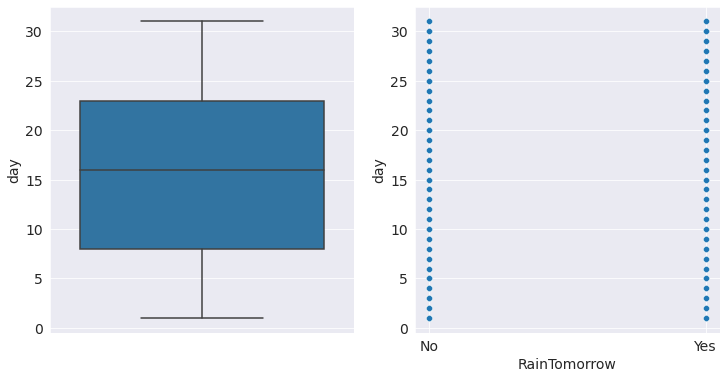

In [23]:
for col in numeric_cols:
  print(col)
  plt.figure(figsize = (12,6))
  plt.subplot(1,2,1)
  sns.boxplot(data = raw_df, y = col)
  plt.subplot(1,2,2)
  sns.scatterplot(data = raw_df, x = 'RainTomorrow', y = col)
  plt.show()

In [39]:
raw_df.shape

(142193, 25)

In [24]:
#MinTemp
x = raw_df.loc[(raw_df['MinTemp']>30) | (raw_df['MinTemp']<-6)]
print('Number of outliers = ', x.shape[0],'\npercentage of the outliers=', str(round(x.shape[0]/raw_df.shape[0]*100,2))+ '%')
raw_df = raw_df.loc[(raw_df['MinTemp']<=30) & (raw_df['MinTemp']>= -6)]

Number of outliers =  75 
percentage of the outliers= 0.05%


In [25]:
#MaxTemp
x = raw_df.loc[(raw_df['MaxTemp']>45) | (raw_df['MaxTemp']<3)]
print('Number of outliers = ', x.shape[0],'\npercentage of the outliers = ', str(round(x.shape[0]/ raw_df.shape[0]*100,2))+'%')
raw_df = raw_df.loc[(raw_df['MaxTemp']<=45) & (raw_df['MaxTemp']>=1)]

Number of outliers =  370 
percentage of the outliers =  0.26%


In [26]:
#Rainfall
x = raw_df.loc[raw_df['Rainfall']>55]
print('Numbers of outliers =', x.shape[0], '\npercentage of the outliers =', str(round(x.shape[0]/raw_df.shape[0]*100,2))+'%')
raw_df = raw_df.loc[raw_df['Rainfall']<=55]

Numbers of outliers = 637 
percentage of the outliers = 0.45%


In [27]:
#Evaporation
x = raw_df.loc[raw_df['Evaporation']>30]
print('Number of outliers =', x.shape[0],'\npercentage of the outliers =', str(round(x.shape[0]/raw_df.shape[0]*100,2))+'%')
raw_df = raw_df.loc[raw_df['Evaporation']<=30]

Number of outliers = 357 
percentage of the outliers = 0.25%


In [28]:
#WindGustSpeed
x = raw_df.loc[raw_df['WindGustSpeed']>=80]
print('Numbers of outliers = ', x.shape[0], '\npercentage of the outliers =',str(round(x.shape[0]/raw_df.shape[0]*100,2))+ '%')
raw_df = raw_df.loc[raw_df['WindGustSpeed']<80]

Numbers of outliers =  1596 
percentage of the outliers = 1.13%


In [29]:
# WindSpeed9am
x=raw_df.loc[raw_df['WindSpeed9am']>40]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/raw_df.shape[0]*100,2))+'%')
raw_df=raw_df.loc[raw_df['WindSpeed9am']<=40]

NO. of outliers = 926 
percentage of the outliers = 0.66%


In [30]:
# WindSpeed3pm
x=raw_df.loc[raw_df['WindSpeed3pm']>45]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/raw_df.shape[0]*100,2))+'%')
raw_df=raw_df.loc[raw_df['WindSpeed3pm']<=45]

NO. of outliers = 435 
percentage of the outliers = 0.31%


In [31]:
# Humidity9am
x=raw_df.loc[raw_df['Humidity9am']<=19]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/raw_df.shape[0]*100,2))+'%')
raw_df=raw_df.loc[raw_df['Humidity9am']>19]

NO. of outliers = 1696 
percentage of the outliers = 1.23%


In [32]:
# Pressure9am
x=raw_df.loc[(raw_df['Pressure9am']>1035)  |  (raw_df['Pressure9am'] <1000)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/raw_df.shape[0]*100,2))+'%')
raw_df=raw_df.loc[(raw_df['Pressure9am']<=1035)  &  (raw_df['Pressure9am'] >=1000)]

NO. of outliers = 1635 
percentage of the outliers = 1.2%


In [33]:
# Pressure3pm
x=raw_df.loc[(raw_df['Pressure3pm']>1032)  |  (raw_df['Pressure3pm'] <1000)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/raw_df.shape[0]*100,2))+'%')
raw_df=raw_df.loc[(raw_df['Pressure3pm']<=1032)  &  (raw_df['Pressure3pm'] >=1000)]

NO. of outliers = 1119 
percentage of the outliers = 0.83%


In [34]:
# Temp9am
x=raw_df.loc[(raw_df['Temp9am']>=35) | (raw_df['Temp9am']<=0)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/raw_df.shape[0]*100,2))+'%')
raw_df=raw_df.loc[(raw_df['Temp9am']<35) & (raw_df['Temp9am']>0)]

NO. of outliers = 317 
percentage of the outliers = 0.24%


In [35]:
# Temp3pm
x=raw_df.loc[(raw_df['Temp3pm']>40) | (raw_df['Temp3pm']<=0)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/raw_df.shape[0]*100,2))+'%')
raw_df=raw_df.loc[(raw_df['Temp3pm']<=40) & (raw_df['Temp3pm']>0)]

NO. of outliers = 354 
percentage of the outliers = 0.27%


MinTemp


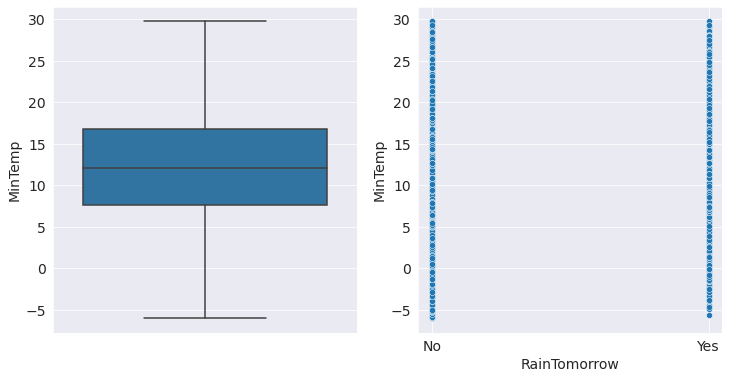

MaxTemp


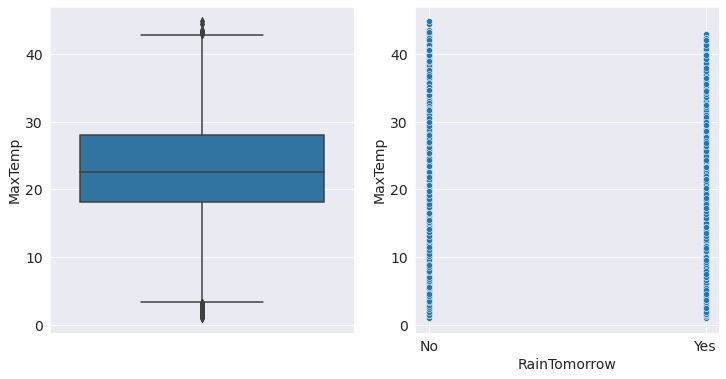

Rainfall


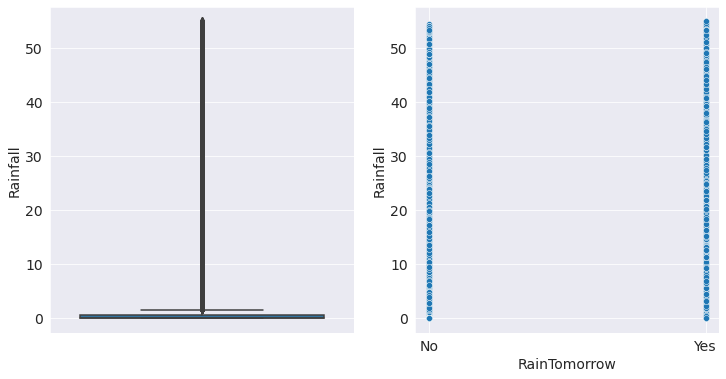

Evaporation


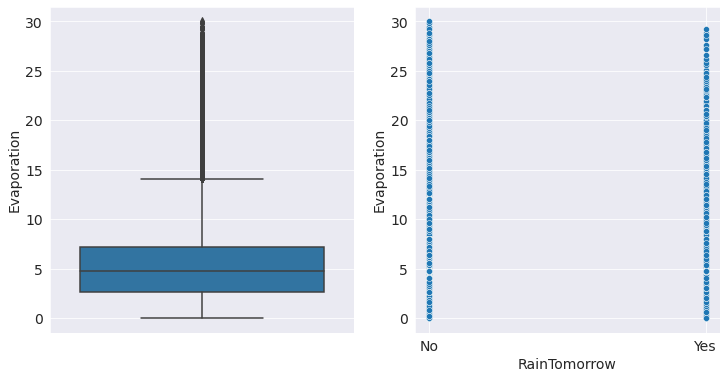

Sunshine


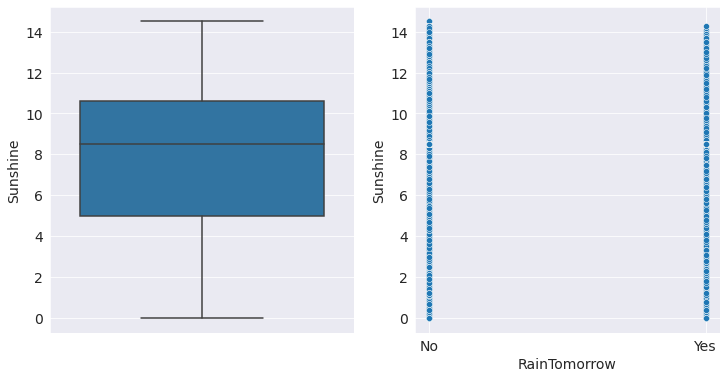

WindGustSpeed


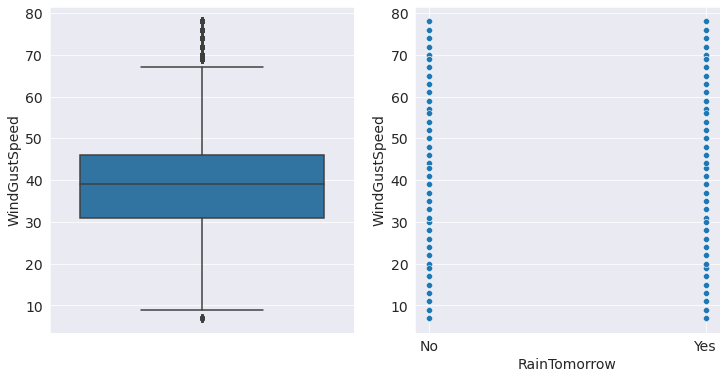

WindSpeed9am


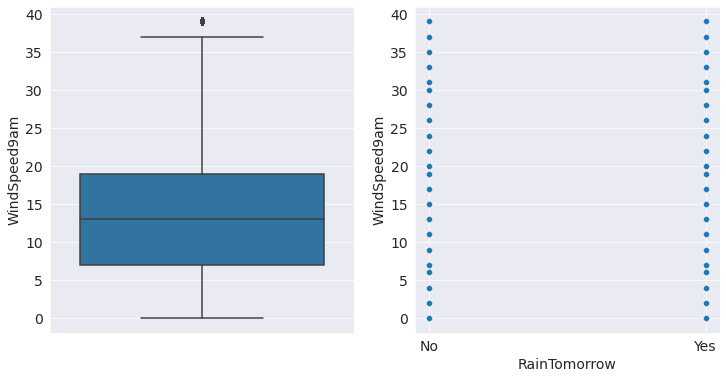

WindSpeed3pm


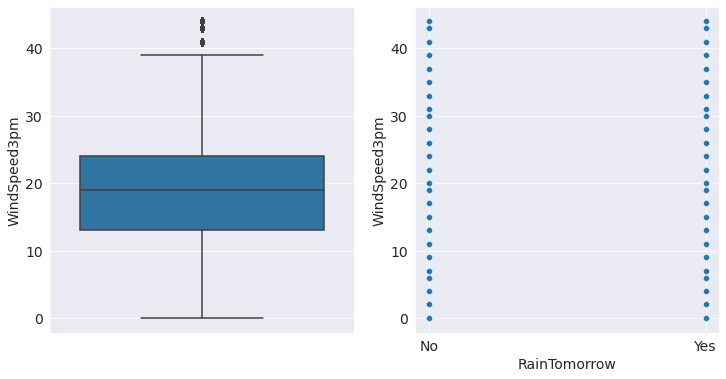

Humidity9am


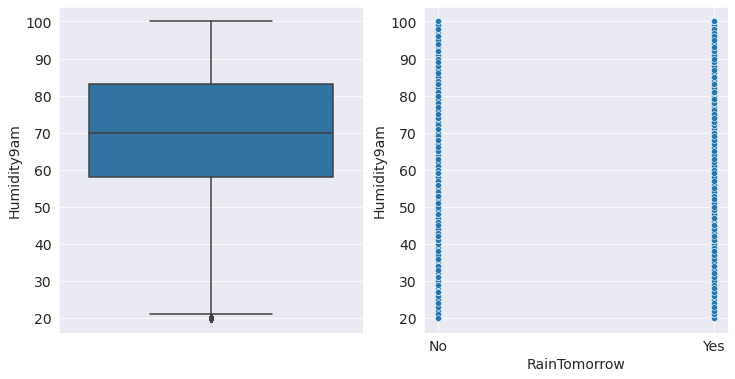

Humidity3pm


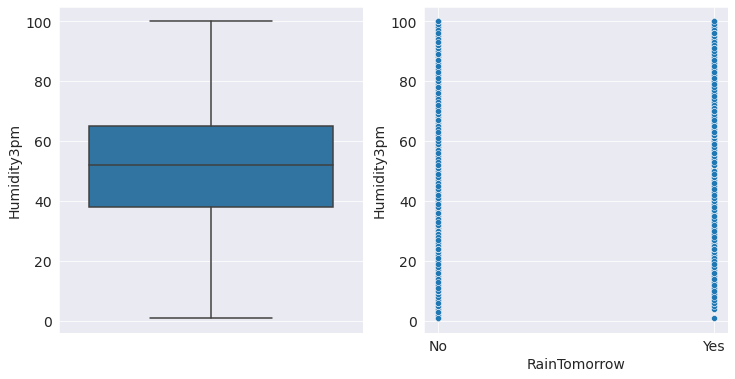

Pressure9am


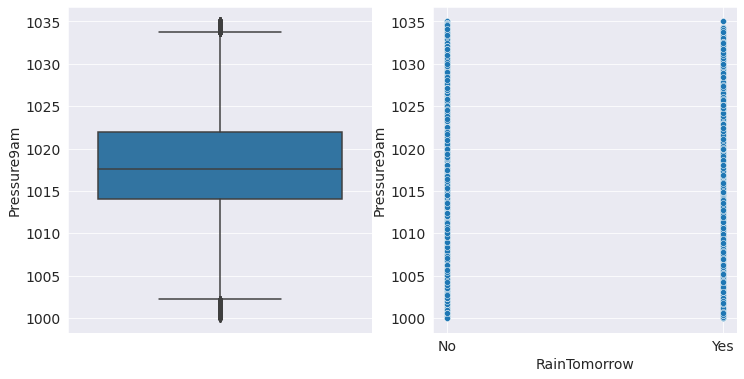

Pressure3pm


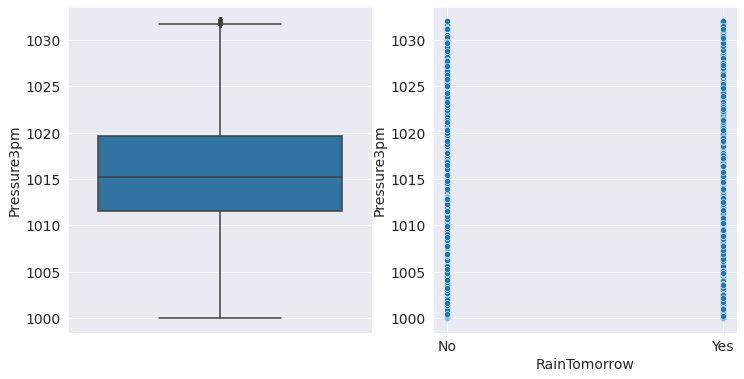

Cloud9am


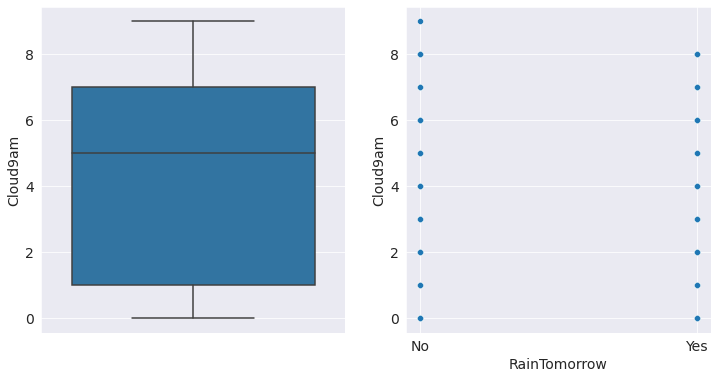

Cloud3pm


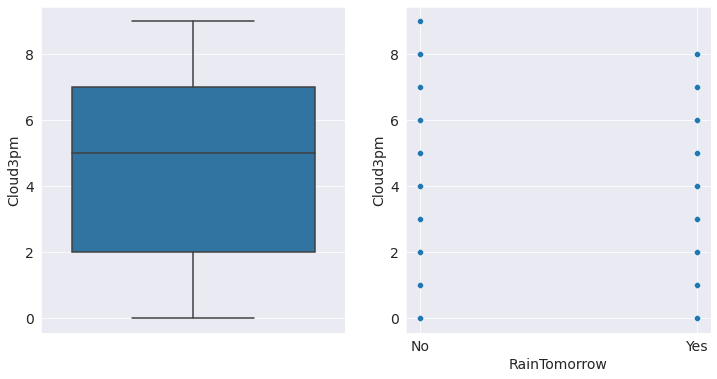

Temp9am


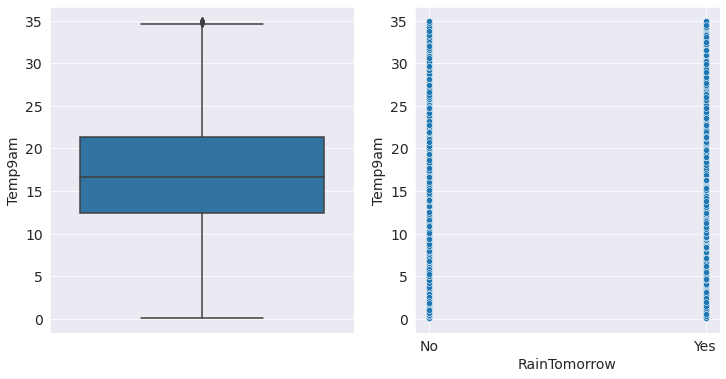

Temp3pm


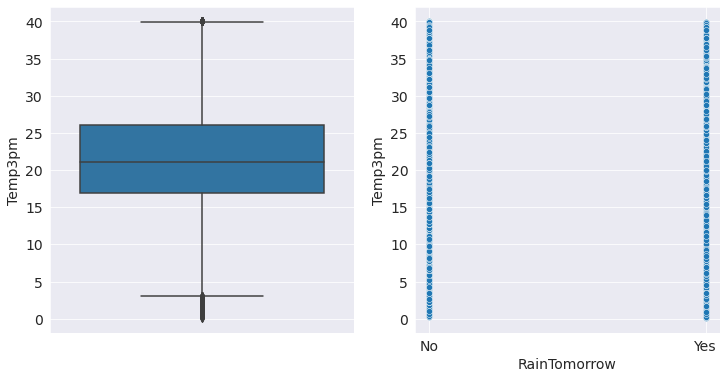

year


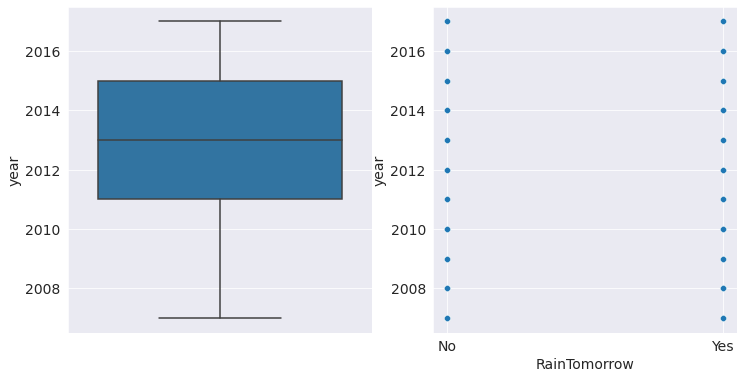

Month


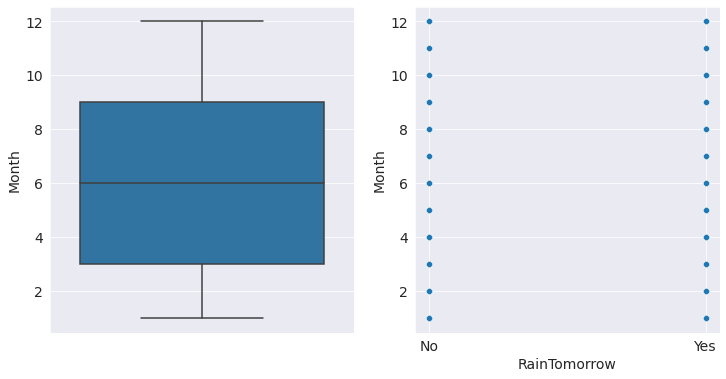

day


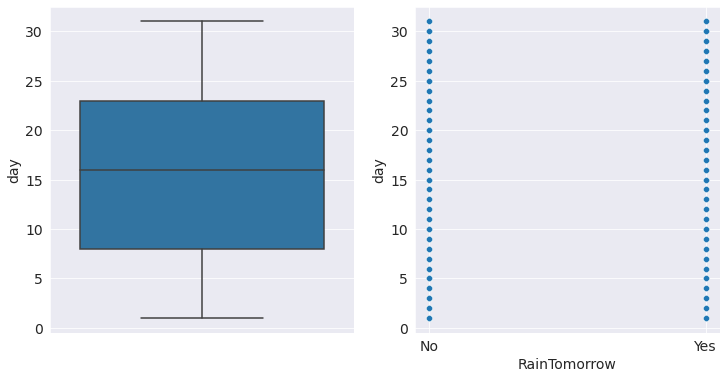

In [34]:
for col in numeric_cols:
  print(col)
  plt.figure(figsize = (12,6))
  plt.subplot(1,2,1)
  sns.boxplot(data = raw_df, y = col)
  plt.subplot(1,2,2)
  sns.scatterplot(data = raw_df, x = 'RainTomorrow', y = col)
  plt.show()

##  Training, Validation and Test Sets:

### Encoding : 

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in object_cols:
  raw_df[i] = label_encoder.fit_transform(raw_df[i])

In [37]:
raw_df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'Month', 'day'],
      dtype='object')

In [38]:
#Chceking data after perfoming label encoder
raw_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,day
0,2,13.4,22.9,0.6,9.6,11.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,5.2,10.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,5.0,8.9,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,4.6,0.9,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.0,6.0,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,6.6,9.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [39]:
x = raw_df.drop(['RainTomorrow', 'day'], axis= 1)
y = raw_df['RainTomorrow']

In [40]:
pd.value_counts(y)

0    104256
1     28588
Name: RainTomorrow, dtype: int64

**SMOTE()**

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.

In [41]:
#Fix the data imbalance
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
x,y = oversampler.fit_resample(x,y)

In [42]:
pd.value_counts(y)

0    104256
1    104256
Name: RainTomorrow, dtype: int64

In [43]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y , test_size = 0.25, random_state = 42)

### Modeling

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [65]:
Model_Report = pd.DataFrame({'Model_Name':[],'Precision':[],'Recall':[],'F1-Score':[],'Accuracy':[],'ROC-AUC':[]})

clfs = {'Logistic Regression': LogisticRegression(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support vector': SVC(),
        'Naive Bayes' : GaussianNB(),
        'Ada Boost' : AdaBoostClassifier(random_state = 42)
        }

from sklearn import metrics
for clf, clf_name in zip(clfs.values(), clfs.keys()):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  t = pd.Series({
      'Model_Name': clf_name,
      'Precision': metrics.precision_score(y_test, y_pred),
      'Recall': metrics.recall_score(y_test, y_pred),
      'F1-Score': metrics.f1_score(y_test, y_pred),
      'Accuracy': metrics.accuracy_score(y_test, y_pred),
      'ROC-AUC': metrics.roc_auc_score(y_test,y_pred)
  })

  Model_Report = Model_Report.append(t, ignore_index = True)
  Model_Report.sort_values(by = 'F1-Score', inplace = True, ascending = False)
Model_Report


,Model_Name,Precision,Recall,F1-Score,Accuracy,ROC-AUC
0,Random Forest,0.904295,0.909199,0.906740,0.906028,0.906013
1,KNN,0.781125,0.932643,0.850186,0.834849,0.834366
2,Decision Tree,0.822340,0.849250,0.835578,0.832067,0.831982
3,Support vector,0.830826,0.826798,0.828807,0.828383,0.828391
6,Ada Boost,0.832494,0.820955,0.826685,0.827040,0.827070
4,Logistic Regression,0.785523,0.762458,0.773819,0.776045,0.776112
5,Naive Bayes,0.772614,0.688801,0.728304,0.741779,0.742040


## Random Forest

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [46]:
#so we are using Random forest has its giiving good accuracy among others.
%%time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test) 

CPU times: user 43.9 s, sys: 534 ms, total: 44.5 s
Wall time: 45 s


In [47]:
%%time
rfc_pred

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


array([0, 0, 1, ..., 1, 0, 0])

In [48]:
pd.value_counts(rfc_pred)

0    26163
1    25965
dtype: int64

In [49]:
def evaluate(test, pred, model):
  from sklearn import metrics
  print('Evaluation Model Performance of :', model)
  print('Accuracy Score :', round(metrics.accuracy_score(test,pred)*100,2))
  print('Precision Score :', round(metrics.precision_score(test,pred)*100,2))
  print('Recall Score :', round(metrics.recall_score(test,pred)*100,2))
  print('F1 Score :', round(metrics.f1_score(test,pred)*100,2),'\n')
  print('Confusion Matrix :\n', metrics.confusion_matrix(test,pred),'\n')
  print('Classification Report :\n',metrics.classification_report(test,pred))

In [50]:
%%time
evaluate(y_test,rfc_pred, 'Random Forest Classifier' )

Evaluation Model Performance of : Random Forest Classifier
Accuracy Score : 90.51
Precision Score : 90.63
Recall Score : 90.34
F1 Score : 90.48 

Confusion Matrix :
 [[23648  2434]
 [ 2515 23531]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     26082
           1       0.91      0.90      0.90     26046

    accuracy                           0.91     52128
   macro avg       0.91      0.91      0.91     52128
weighted avg       0.91      0.91      0.91     52128

CPU times: user 147 ms, sys: 3.13 ms, total: 151 ms
Wall time: 148 ms


In [51]:
#Training score
rfc.score(x_train, y_train)

1.0

In [52]:
#Testing score
rfc.score(x_test, y_test)

0.9050606200122775

- Although training accuracy is 100% , the accutrcay on testing data is nearly 90%.
- It apperas that model has learned training examples perfect and doesn't fully generalize well to unseen data.
- This phenomenon is called `Overfitting` , and reducing overfitting is one of the most important parts of any machine learning project.

In [53]:
pd.value_counts(y_test)/ len(y_test)

0    0.500345
1    0.499655
Name: RainTomorrow, dtype: float64

In [54]:
#To visualize the confusion matrix
def conf_mat(test, pred, model):
  from sklearn import metrics
  cm = metrics.confusion_matrix(test, pred)
  con_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0','Actual:1'])
  plt.figure(figsize = (8,5))
  sns.heatmap(con_matrix, annot = True, fmt = 'd')
  fm = {'size':18, 'weight':'bold'}
  plt.title(model, **fm)
  plt.show()

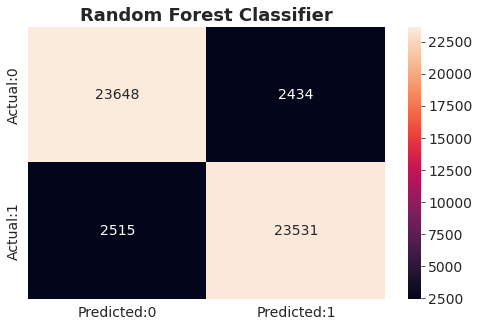

In [55]:
conf_mat(y_test, rfc_pred,'Random Forest Classifier')

We can can access individual decision trees using `model.estimators_`

In [56]:
rfc.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

In [57]:
len(rfc.estimators_)

100

## Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [58]:
rfc.feature_importances_

array([0.02599457, 0.03243902, 0.03082261, 0.09742112, 0.0290533 ,
       0.05372471, 0.02086592, 0.05223891, 0.02274292, 0.02340583,
       0.02658693, 0.0310925 , 0.05252225, 0.16541067, 0.04036191,
       0.05153947, 0.05558876, 0.07243177, 0.02945111, 0.03386086,
       0.01094332, 0.01934494, 0.0221566 ])

Let's turn this into a dataframe and visualize the most important features.

In [59]:
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'importance': rfc.feature_importances_
}).sort_values('importance', ascending = False)

In [60]:
importance_df.head(10)

,Feature,importance
13,Humidity3pm,0.165411
3,Rainfall,0.097421
17,Cloud3pm,0.072432
16,Cloud9am,0.055589
5,Sunshine,0.053725
12,Humidity9am,0.052522
7,WindGustSpeed,0.052239
15,Pressure3pm,0.051539
14,Pressure9am,0.040362
19,Temp3pm,0.033861


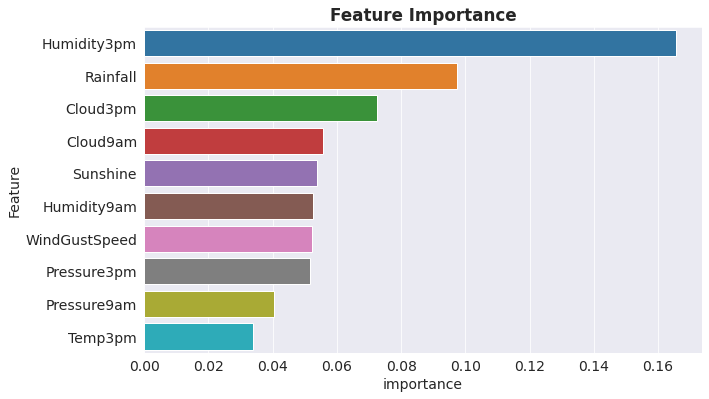

In [61]:
plt.title('Feature Importance', fontweight='bold')
sns.barplot(data = importance_df.head(10), x = 'importance', y ='Feature');

In [ ]:
# Feature importance using shape
# import shap

# shap_values = shap.TreeExplainer(rfc).shap_values(x_test)
# shap.summary_plot(shap_values, x_train, plot_type = 'bar')

## GridSearchCV

- `n_jobs` allows the random forest to use mutiple parallel workers to train decision trees 
- `random_state=42` ensures that the we get the same results for each execution.
- `n_estimators` This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed. 



-  `max_depth` and `max_leaf_nodes`

These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a `max_depth` to reduce overfitting.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

In [62]:
from sklearn.model_selection import GridSearchCV

n_folds = 10
param_grid = {
              'n_estimators':[200,400,500],
              'criterion':['gini','entropy'],
              'max_depth':[4,5,6,7,8,9],
              'max_features':['auto','sqrt','log2']   
}

grid_rfc = GridSearchCV(estimator = rfc,
                        param_grid = param_grid,
                        verbose = 3,
                        n_jobs = -1,
                        cv = n_folds,
                        return_train_score = True
                        )

In [62]:
from sklearn.model_selection import RandomizedSearchCV

n_folds = 3

n_estimators = [i for i in range(0,500,150)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]


param_grid = {
              'n_estimators':n_estimators,
              'criterion':['gini','entropy'],
              'max_depth':max_depth,
              'max_features':max_features,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap   
}

random_rfc = RandomizedSearchCV(estimator = rfc,
                        param_distributions = param_grid,
                        verbose = 3,
                        n_jobs = -1,
                        cv = n_folds,
                        return_train_score = True
                        )

In [63]:
%%time
random_rfc.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 1min 47s, sys: 1.57 s, total: 1min 49s
Wall time: 18min 11s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [0, 150, 300, 450]},
                   return_train_score=True, verbose=3)

In [64]:
random_rfc.best_score_

0.9017802332719459

In [65]:
random_rfc.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

In [75]:
rfc_best = RandomForestClassifier(n_estimators= 150,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features='auto',
 max_depth=40,
 criterion= 'gini',
 bootstrap= False)

In [76]:
rfc_best.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=150)

In [77]:
random_rfc_pred = rfc_best.predict(x_test)

In [78]:
evaluate(y_test, random_rfc_pred, 'GridSearchCV Random Forest ')

Evaluation Model Performance of : GridSearchCV Random Forest 
Accuracy Score : 91.62
Precision Score : 91.8
Recall Score : 91.4
F1 Score : 91.6 

Confusion Matrix :
 [[23956  2126]
 [ 2240 23806]] 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     26082
           1       0.92      0.91      0.92     26046

    accuracy                           0.92     52128
   macro avg       0.92      0.92      0.92     52128
weighted avg       0.92      0.92      0.92     52128



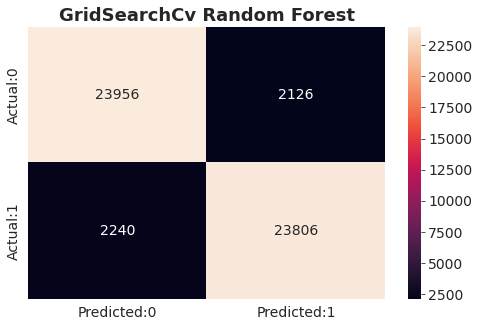

In [79]:
conf_mat(y_test, random_rfc_pred, 'GridSearchCv Random Forest')

In [80]:
rfc_best.score(x_train,y_train), rfc_best.score(x_test, y_test)

(1.0, 0.916244628606507)

There is not much changes in accurcay but its still best.So we are going saved the model.

## Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` or `Pickle` module to save and load Python objects on the disk. 
Here we are going to use `pickle`

In [ ]:
import joblib

In [202]:
import pickle
filename = 'rfc_best_model.pkl'
pickle.dump(rfc_best, open(filename, 'wb'))

Lets reload and check predictions

In [203]:
pickled_model = pickle.load(open('rfc_best_model.pkl', 'rb'))
pickled_model.predict(x_test)

array([0, 0, 1, ..., 1, 0, 0])

checking score

In [205]:
pickled_model.score(x_test,y_test)

0.916244628606507